# Evolutionaty solution of heat equation

In [1]:
%pylab inline
plt.rcParams['figure.figsize'] = (14, 10)

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.sparse import spdiags
from scipy.sparse.linalg import spsolve

## Use steady state solution as initial

In [3]:
k, H, n, tc, q = 2.5, 1e-6, 100, 35000, -0.02

In [4]:
x = linspace(0, tc, n)  # pozice uzlu
dx = tc / (n - 1)       # vzdalenost uzlu
d = ones(n)

In [5]:
A = spdiags([d, -2*d, d], [-1, 0, 1], n, n, 'csr')
b = -d * H * dx**2 / k

In [6]:
A[0, :2] = [1, 0]
b[0] = 0
A[-1, -2:] = [2, -2]
b[-1] += 2 * q * dx / k

In [7]:
ti = spsolve(A, b)

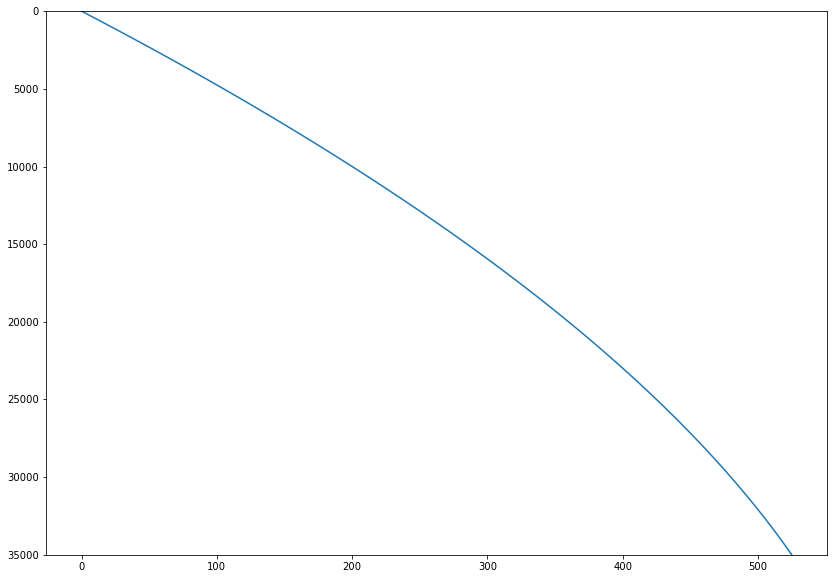

In [8]:
plot(ti, x)
ylim(tc, 0);

## Modify steady state solution

In [9]:
ti[logical_and(x<10000, x>5000)] = 700

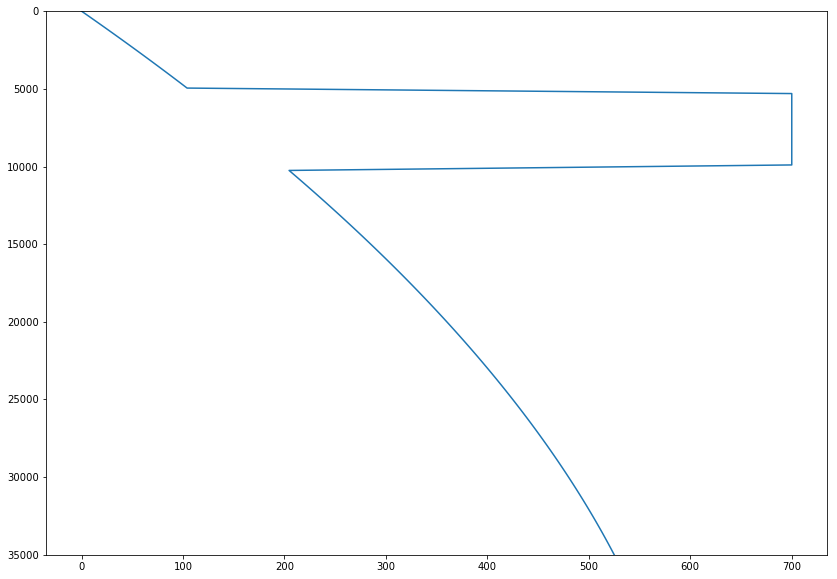

In [10]:
plot(ti, x)
ylim(tc, 0);

## Evolutionary solution

In [11]:
k, H, n, tc, q, rho, c = 2.5, 1e-6, 100, 35000, -0.02, 2800, 900

In [12]:
x = linspace(0, tc, n)  # pozice uzlu
dx = tc / (n - 1)       # vzdalenost uzlu
d = ones(n)
kappa = k / (rho * c)

In [13]:
dt = 0.9*dx**2/(2 * kappa)
u = kappa*dt/dx**2

In [14]:
A = spdiags([d*u, d*(1 - 2*u), d*u], [-1, 0, 1], n, n, 'csr')
b = d * H * dt / (rho *c)

In [15]:
A[0, :2] = [1, 0]
b[0] = 0
A[-1, -2] = 2*u
b[-1] = dt*(H*dx - 2*q)/(rho * c *dx)

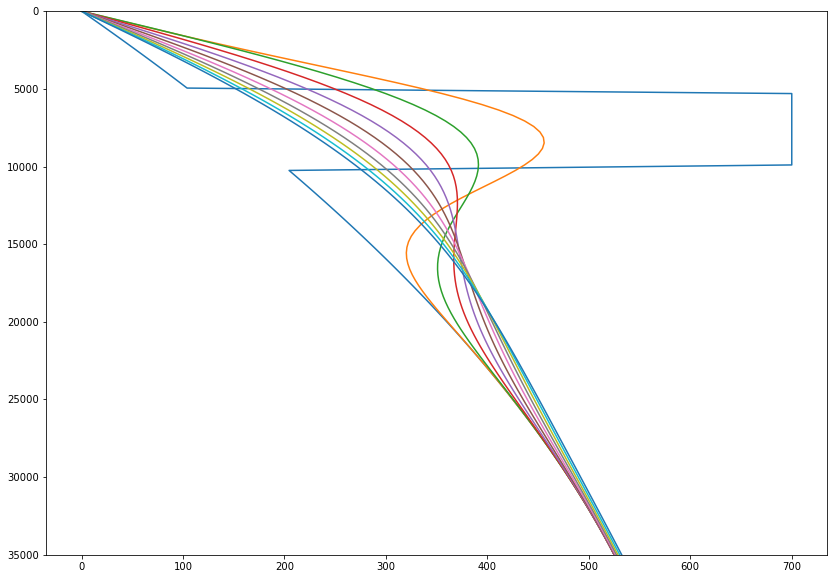

In [16]:
t = ti
res = []
tt = []
total_time = 0
plot(ti ,x)
for j in range(10):
    for i in range(100):
        t = A.dot(t) + b
        res.append(t)
        total_time += dt
        tt.append(total_time/(365.25*24*3600))
    plot(t, x)
ylim(tc, 0);
res = asarray(res)

In [17]:
total_time/(365.25*24*3600)

1796531.2595391239

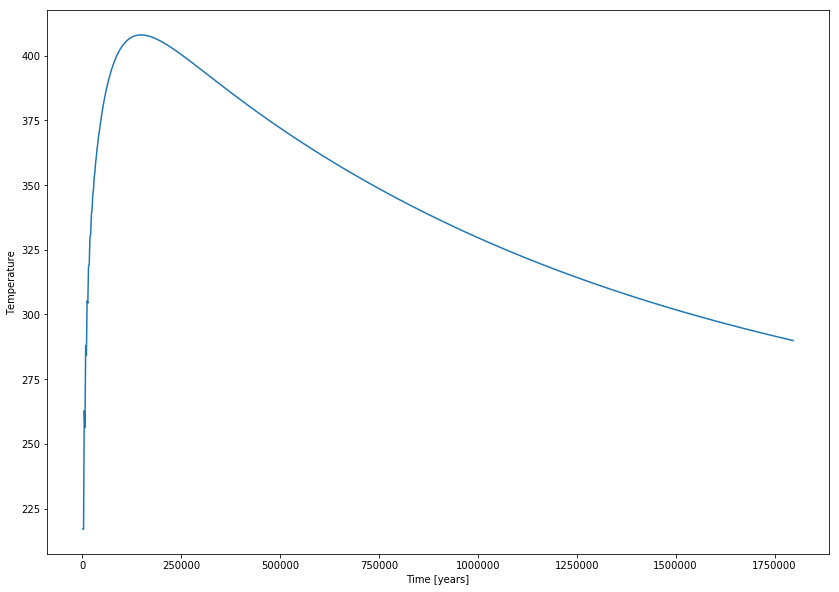

In [18]:
plot(tt, res[:,31])
xlabel('Time [years]')
ylabel('Temperature')